##**Theme 3 - Machine Learning in Finance - Credit Score Prediction**
##Group 1

###1. Lee Jian Wen (23004945/1)
###2. Lim Zi Yang (23005022/1)
###3. Yoonseo Han (22104607/1)
###4. Jonathan Siew Zunxian (23004944/1)
###5. Tan Hao Wen (23004923/1)

**Our Problem** : Given a person’s credit-related information, build a machine learning model that can classify the credit score.(Regression)

WIA1007_Group_Assignment_Group_1_Datasets

https://drive.google.com/drive/folders/1wYmh71-Lj-niylV6cp3f2AoWh34519qA?usp=sharing

1. train.csv:

This file is used to train a machine learning model.

2. test.csv:

This file is used to evaluate the performance of a trained machine learning model.

##Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Exploration



```
# This is formatted as code
```

Displaying the first 5 rows of the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

<ipython-input-2-2021958089f0>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Explanation of each column

1. ID: Represents a unique identifier or key for each record in the dataset.

2. Customer_ID: Represents a unique identifier for each customer or individual in the dataset.

3. Month: Represents the month associated with the data entry or record.

4. Name: Represents the name of the customer or individual.

5. Age: Represents the age of the customer.

6. SSN: Represents the Social Security Number or a unique identification number for the customer (sensitive information).

7. Occupation: Represents the occupation or job type of the customer.

8. Annual_Income: Represents the annual income of the customer.

9. Monthly_Inhand_Salary: Represents the monthly salary or income after deductions.

10. Num_Bank_Accounts: Represents the number of bank accounts held by the customer.

11. Num_Credit_Card: Represents the number of credit cards owned by the customer.

12. Interest_Rate: Represents the interest rate (possibly related to loans or credit cards).

13. Num_of_Loan: Represents the number of loans taken by the customer.

14. Type_of_Loan: Represents the type or category of loans taken by the customer.

15. Delay_from_due_date: Represents the delay in payments from the due date.

16. Num_of_Delayed_Payment: Represents the number of delayed payments made by the customer.

17. Changed_Credit_Limit: Represents changes in the credit limit for the customer.

18. Num_Credit_Inquiries: Represents the number of credit inquiries made by the customer.

19. Credit_Mix: Represents the mix of different types of credit (e.g., credit cards, loans) held by the customer.

20. Outstanding_Debt: Represents the outstanding debt amount.

21. Credit_Utilization_Ratio: Represents the ratio of credit used to the total credit limit.

22. Credit_History_Age: Represents the age of the credit history.

23. Payment_of_Min_Amount: Represents whether the customer has made minimum payments on their debts.

24. Total_EMI_per_month: Represents the total Equated Monthly Installments (EMI) paid by the customer.

25. Amount_invested_monthly: Represents the monthly amount invested by the customer.

26. Payment_Behaviour: Represents the payment behavior or pattern of the customer.

27. Monthly_Balance: Represents the monthly balance in the customer's financial account.

28. Credit_Score: Represents the credit score of the customer.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Gathering basic information about the dataset such as data types and number of missing values

<ipython-input-4-57aa5908cc22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, ax=ax, width=0.8, palette="Set2")
<ipython-input-4-57aa5908cc22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, ax=ax, width=0.8, palette="Set2")
<ipython-input-4-57aa5908cc22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=column, data=df, ax=ax, width=0.8, palette="Set2")
<ipython-input-4-57aa5908cc22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

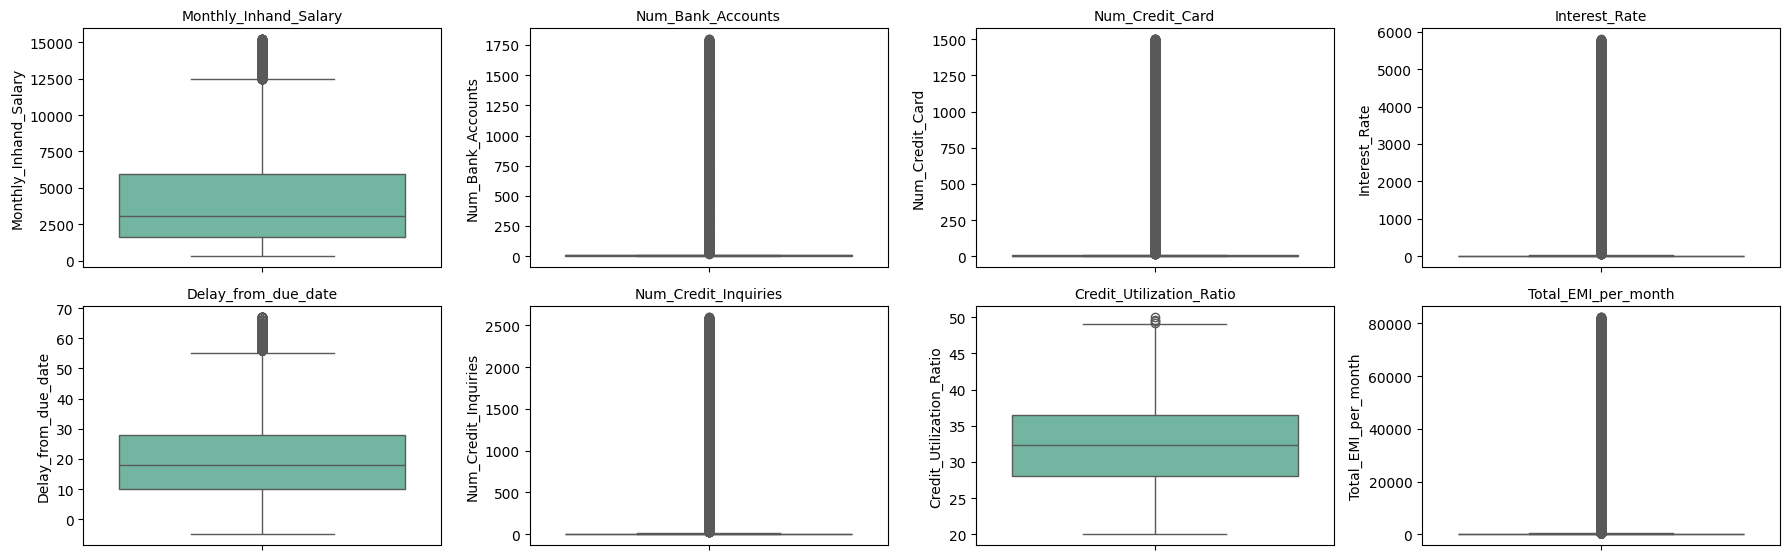

In [ ]:
#Get some insights of our dataset
def make_boxplot(df, column, ax):
    sns.boxplot(y=column, data=df, ax=ax, width=0.8, palette="Set2")
    ax.set_title(column, fontdict={"fontsize": 10})
    ax.tick_params(axis='x', rotation=90)

fig = plt.figure(figsize=(18, 14))
numb_columns = df.select_dtypes(include="number").columns

for i, column in enumerate(numb_columns):
    ax = fig.add_subplot(5, 4, i+1)
    make_boxplot(df, column, ax)
    plt.tight_layout(pad=0.3)

plt.tight_layout()
plt.show()

**Information:**

**Outliers:** There are outliers in several features, such as annual income, monthly salary, number of credit cards, interest rate, number of loans, delay from due date, number of delayed payments, changed credit limit, number of credit inquiries, outstanding debt, credit utilization ratio, total EMI per month, amount invested monthly, and monthly balance. This could be due to a number of factors, such as data entry errors or extreme values in the population.

**Skewness:** Several features appear to be skewed, such as annual income, monthly salary, number of credit cards, interest rate, number of loans, delay from due date, number of delayed payments, changed credit limit, number of credit inquiries, outstanding debt, credit utilization ratio, total EMI per month, amount invested monthly, and monthly balance. This means that the distribution of the data is not symmetrical.

**Distribution of Credit Score**

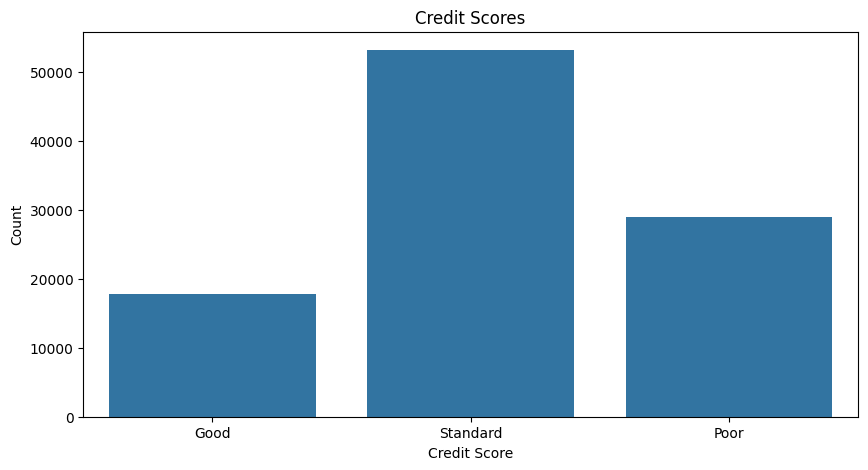

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Credit_Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Credit Scores')
plt.xticks()
plt.show()

**Effects of Age on target**

<Axes: xlabel='Age', ylabel='count'>

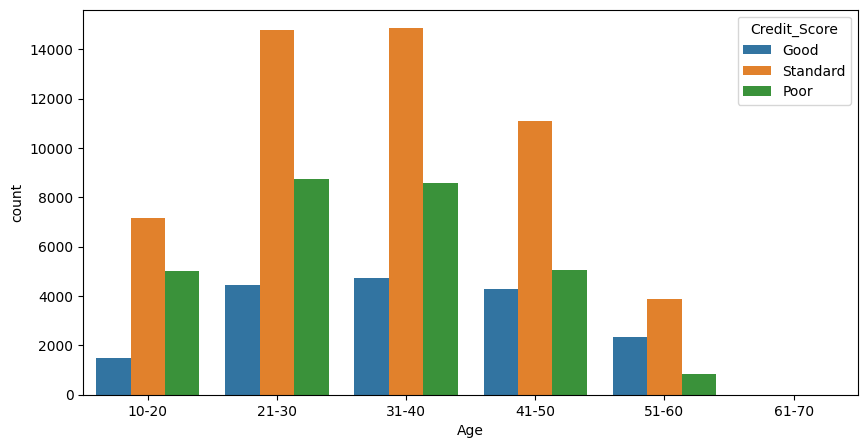

In [ ]:
# Age Grouping
age = pd.to_numeric(df['Age'].str.replace("_", ""), errors='coerce')

age_bins = [10, 20, 30, 40, 50, 60, 70]
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70']

Group_Age = pd.cut(age, bins=age_bins, labels=age_labels)

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=Group_Age, hue='Credit_Score')

**Effects of Monthly Inhand Salary on target**

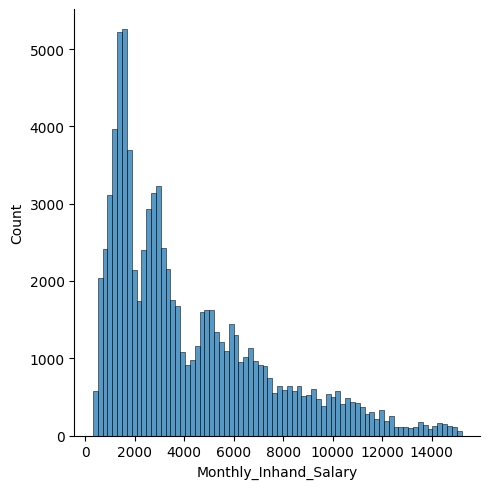

In [ ]:
sns.displot(df['Monthly_Inhand_Salary'])

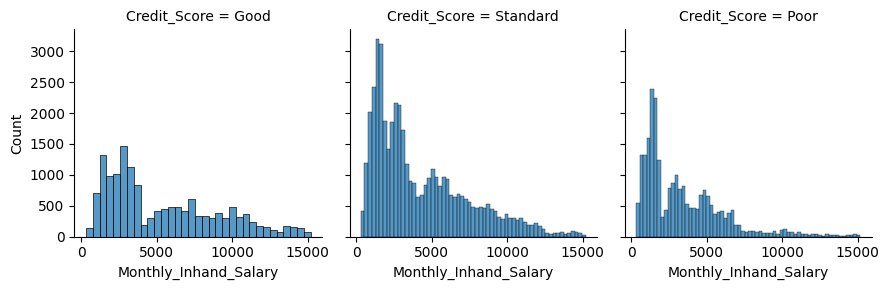

In [ ]:
grid = sns.FacetGrid(df, col = 'Credit_Score')
grid.map(sns.histplot, 'Monthly_Inhand_Salary')

Gathering basic information about the summary statistics of the dataset (min, max, mean, standard deviation and quartiles) 25%-1st quartile 50%-2nd quartile 75%-3rd quartile 100%-4th quartile

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


 Representing the count of duplicated rows in the dataset

In [ ]:
df.duplicated().sum()

0

##Data Preprocessing

###Data Cleaning

In [ ]:
missing_values = df.isnull().sum()
print("Column Name                    Missing Values")
for column, count in missing_values.items():
  print(f"{column:<30} {count}")

Column Name                    Missing Values
ID                             0
Customer_ID                    0
Month                          0
Name                           9985
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          15002
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   11408
Delay_from_due_date            0
Num_of_Delayed_Payment         7002
Changed_Credit_Limit           0
Num_Credit_Inquiries           1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        4479
Payment_Behaviour              0
Monthly_Balance                1200
Credit_Score                   0


In [ ]:
#Most of the following columns are in the type of object, when in fact they are numerical values
Columns_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

#Convert numerical values to the type of float, and also replace unnecessary "_" in the dataset
def fix_num(num):
    try :
        return float(num.replace("_",""))
    except :
        return np.nan

for col in Columns_to_fix :
    df[col] = df[col].apply(fix_num)

`SSN` column:


*   The `SSN` column is a field that likely contains sensitive or personally identifiable information (Social Security Number)
*   It's  unnecessary or potentially sensitive for future processing or predictive modeling tasks.

*   **Action:** Removes the entire column





In [ ]:
#'SSN' is not useful for future processing and prediction
df.drop(columns=['SSN'], inplace=True)

`Customer_ID` column:


*   In this dataset,the data is displayed in groups where rows are sharing the same `Customer_ID`
*   Using `Customer_ID`, we segment the data into subsets, where each subset contains rows associated with a specific customer by conducting grouping by `Customer_ID`



In [ ]:
# Define identical groups by 'Customer_ID'
grouped = df.groupby(['Customer_ID'],group_keys=True)

`Name`, `Monthly_Inhand_Salary` column:


*   In these column, there exists null values that appear frequently

*   **Action:** Impute missing values within each group using non-null values from the same group





In [ ]:
# Fill null values in 'Name' within each group using non-null values from the same group
filled_Name = grouped['Name'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

# Replace the original 'Name' with the filled values
df['Name'] = filled_Name

In [ ]:
# Fill null values in 'Monthly_Inhand_Salary' within each group using non-null values from the same group
filled_Monthly_Inhand_Salary = grouped['Monthly_Inhand_Salary'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

# Replace the original 'Monthly_Inhand_Salary' with the filled values
df['Monthly_Inhand_Salary'] = filled_Monthly_Inhand_Salary

`Age`, `Num_Bank_Accounts`, `Num_Credit_Card`, `Interest_Rate`, `Num_of_Loan` column:


*   In these column, there exists extreme values and outliers

*   **Action:**   
Identify potential outliers and impute missing values within groups (`Customer_ID`) using non-null values from the same group







In [ ]:
df.loc[df['Age'] > 100, 'Age'] = np.nan

In [ ]:
# Calculate z-scores for the 'Age'
z_scores = np.abs((df['Age'] - df['Age'].mean()) / df['Age'].std())

outlier_threshold = 1.05

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Age'] = np.nan

filled_Age = grouped['Age'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Age'] = filled_Age

In [ ]:
# Find unique values in 'Age' column
unique_values = df['Age'].unique()

# Display unique values
print(unique_values)


[17. 18. 25. 26. 19. 43. 44. 27. 15. 51. 52. 30. 31. 40. 45. 28. 14. 36.
 37. 50. 20. 41. 42. 46. 24. 54. 32. 55. 38. 39. 22. 23. 29. 48. 49. 35.
 53. 21. 33. 34. 47. 16. 56.]


In [ ]:
df.loc[df['Num_Bank_Accounts'] > 40, 'Num_Bank_Accounts'] = np.nan
df.loc[df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = np.nan

In [ ]:
# Calculate z-scores for  'Num_Bank_Accounts'
z_scores = np.abs((df['Num_Bank_Accounts'] - df['Num_Bank_Accounts'].mean()) / df['Num_Bank_Accounts'].std())

# Define a threshold for outliers based on z-score (commonly set at 3 or -3)
outlier_threshold = 3.00

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Num_Bank_Accounts'] = np.nan

filled_Num_Bank_Accounts = grouped['Num_Bank_Accounts'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Num_Bank_Accounts'] = filled_Num_Bank_Accounts

In [ ]:
# Find unique values in 'Num_Bank_Accounts' column
unique_values = df['Num_Bank_Accounts'].unique()

# Display unique values
print(unique_values)


[ 6.  1.  3.  7.  2.  5.  8.  4.  0. 10.  9. 11.]


In [ ]:
df.loc[df['Num_Credit_Card'] > 40, 'Num_Credit_Card'] = np.nan

In [ ]:
# Calculate z-scores for  'Num_Credit_Card'
z_scores = np.abs((df['Num_Credit_Card'] - df['Num_Credit_Card'].mean()) / df['Num_Credit_Card'].std())

# Define a threshold for outliers based on z-score (commonly set at 3 or -3)
outlier_threshold = 3.00

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Num_Credit_Card'] = np.nan

filled_Num_Credit_Card = grouped['Num_Credit_Card'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Num_Credit_Card'] = filled_Num_Credit_Card

In [ ]:
# Find unique values in 'Num_Credit_Card' column
unique_values = df['Num_Credit_Card'].unique()

# Display unique values
print(unique_values)


[ 5.  4.  3.  7.  6.  8. 10.  9.  2.  1. 11.  0.]


In [ ]:
df.loc[df['Interest_Rate'] > 100, 'Interest_Rate'] = np.nan
df.loc[df['Interest_Rate'] < 0, 'Interest_Rate'] = np.nan

In [ ]:
# Calculate z-scores for  'Interest_Rate'
z_scores = np.abs((df['Interest_Rate'] - df['Interest_Rate'].mean()) / df['Interest_Rate'].std())

# Define a threshold for outliers based on z-score (commonly set at 3 or -3)
outlier_threshold = 3.00

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Interest_Rate'] = np.nan

filled_Interest_Rate = grouped['Interest_Rate'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Interest_Rate'] = filled_Interest_Rate

In [ ]:
# Find unique values in 'Interest_Rate' column
unique_values = df['Interest_Rate'].unique()

# Display unique values
print(unique_values)


[27. 17.  1.  6. 16. 23.  9. 11.  2. 10. 30. 26.  5. 18. 14.  4. 24.  8.
 15. 21.  7. 19. 31. 33. 34. 13. 20. 28. 32. 29. 12. 25.  3. 22.]


In [ ]:
df.loc[df['Num_of_Loan'] > 100, 'Num_of_Loan'] = np.nan
df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = np.nan

In [ ]:
# Calculate z-scores for  'Num_of_Loan'
z_scores = np.abs((df['Num_of_Loan'] - df['Num_of_Loan'].mean()) / df['Num_of_Loan'].std())

# Define a threshold for outliers based on z-score (commonly set at 3 or -3)
outlier_threshold = 3.00

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Num_of_Loan'] = np.nan

filled_Num_of_Loan = grouped['Num_of_Loan'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Num_of_Loan'] = filled_Num_of_Loan

In [ ]:
# Find unique values in 'Num_of_Loan' column
unique_values = df['Num_of_Loan'].unique()

# Display unique values
print(unique_values)


[2. 4. 0. 3. 8. 1. 9. 7. 6. 5.]


`Delay_from_due_date` column:


*   In this column, there exists illogical negative values that might cause inaccurate prediction or modelling in the future

*   **Action**   
Identify negative values and replace them with 0







In [ ]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
# Find unique values in 'Delay_from_due_date' column
unique_values = df['Delay_from_due_date'].unique()

# Display unique values
print(unique_values)


[ 3  0  5  6  8  7 13 10  4  9  1 12 11 30 31 34 27 14  2 16 17 15 23 22
 21 18 19 52 51 48 53 26 43 28 25 20 47 46 49 24 61 29 50 58 45 59 55 56
 57 54 62 65 64 67 36 41 33 32 39 44 42 60 35 38 63 40 37 66]


`Occupation`, `Credit_Mix` column:


*   In these column, there exists "_______"and "_" values which is illogical and not informative

*   **Action:**   

  1. Replace "_______"and "_" values in respective columns with null values
  2.  Impute missing values within groups (`Customer_ID`) using non-null values from the same group







In [ ]:
# Replace "_______" values in the 'Occupation' column with NaN

df['Occupation'] = df['Occupation'].replace('_______', np.nan)

filled_Occupation = grouped['Occupation'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Occupation'] = filled_Occupation


In [ ]:
# Replace "_" values in the 'Credit_Mix' column with NaN


df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

filled_Credit_Mix = grouped['Credit_Mix'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Credit_Mix'] = filled_Credit_Mix


`Type_of_Loan` column:



*   In this column, it consists of data such as "Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan" and also missing values
  * The complexity of data in this column causes difficulty when it comes to future analysis that requires data from `Type_of_Loan` column

*   **Action:**

    1.   Fills missing values in the `Type_of_Loan` column with the string 'Not Specified'.
    2.   Retrieves the top 9 loan types, which are `Credit-Builder Loan`, `Personal Loan`, `Debt Consolidation Loan`, `Student Loan`, `Payday Loan`, `Mortgage Loan`, `Auto Loan`, `Home Equity Loan` excluding the most frequent type (index 0) since it's presumed to be the most common and not included
    4. Deletes `Type_of_Loan` column from the dataset





In [ ]:
df['Type_of_Loan'].fillna('Not Specified', inplace=True)

# Rebuild Type of loans Columns
for i in df['Type_of_Loan'].value_counts().head(9).index[1:]:
    df[i] = df['Type_of_Loan'].str.contains(i).astype(int)

del df['Type_of_Loan']


`Num_of_Delayed_Payment`, `Num_Credit_Inquiries` column:


*   In these column, there exists extreme values and outliers, causing significant inconsistency of data presentation

*   **Action:**   

  1.  Identify negative values and replace them with 0
  2. Identify visible outliers in the each respective column and replaces them with null values  
  2. Identify potential outliers in respective columns based on z-scores and replaces them with null values
  3.  Impute missing values within groups (`Customer_ID`) using the mean of values from the same group







In [ ]:
# Replace negative values with 0 in 'Num_of_Delayed_Payment'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: 0 if x < 0 else x)


In [ ]:
df.loc[df['Num_of_Delayed_Payment'] > 100, 'Num_of_Delayed_Payment'] = np.nan

In [ ]:
# Calculate z-scores for  'Num_of_Delayed_Payment'
z_scores = np.abs((df['Num_of_Delayed_Payment'] - df['Num_of_Delayed_Payment'].mean()) / df['Num_of_Delayed_Payment'].std())

# Define a threshold for outliers based on z-score (commonly set at 3 or -3)
outlier_threshold = 3.00

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Num_of_Delayed_Payment'] = np.nan

# Replace null values within each group with the mean of non-null values within that group
df['Num_of_Delayed_Payment'] = grouped['Num_of_Delayed_Payment'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [ ]:
# Find unique values in 'Num_of_Delayed_Payment' column
unique_values = df['Num_of_Delayed_Payment'].unique()

# Display unique values
print(unique_values)

[25 23 28 26 17 16 18 19  7  9  8 12 14 15 13 10 22 20 21  2  1  5 11  4
  3  6  0 24 27]


In [ ]:
df.loc[df['Num_Credit_Inquiries'] > 100, 'Num_Credit_Inquiries'] = np.nan

# Calculate z-scores for  'Num_Credit_Inquiries'
z_scores = np.abs((df['Num_Credit_Inquiries'] - df['Num_Credit_Inquiries'].mean()) / df['Num_Credit_Inquiries'].std())

# Define a threshold for outliers based on z-score (commonly set at 3 or -3)
outlier_threshold = 3.00

# Replace outliers in the column with null values
df.loc[z_scores > outlier_threshold, 'Num_Credit_Inquiries'] = np.nan

df['Num_Credit_Inquiries'] = grouped['Num_Credit_Inquiries'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(int)

In [ ]:
# Find unique values in 'Num_Credit_Inquiries' column
unique_values = df['Num_Credit_Inquiries'].unique()

# Display unique values
print(unique_values)

[10 11  2  4  1  7  3  9  8  5  0  6 12 15 14 13 16 17]


`Changed_Credit_Limit`, `Amount_invested_monthly`, `Monthly_Balance` column:


*   In these columns, there exists null values that appear frequently

*   **Action:** Impute missing values within each group using the mean of non-null values from the same group





In [ ]:
df['Changed_Credit_Limit'] = grouped['Changed_Credit_Limit'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [ ]:
df['Amount_invested_monthly'] = grouped['Amount_invested_monthly'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)

In [ ]:
df['Monthly_Balance'] = grouped['Monthly_Balance'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True)
# Fill in the remaining missing values with 0
df['Monthly_Balance'].fillna(0, inplace=True)

`Credit_History_Age` column:

*   The data in column is each presented in the form of a string representing a duration in years and months
    * This indirect presentation is not useful when it comes to future modelling
*   There also exists missing values that appear frequently
* **Action:**
    1.   Defines a function `convert_to_months` that takes a string representing a duration in years and months and converts it into a total duration in months
    2. Apply the function to each element in the `Credit_History_Age` column of the dataset. It converts strings representing durations ('X years Y months') into their equivalent durations in total months, leaving non-string values (already in numeric format) unchanged
    3. Impute missing values within groups (`Customer_ID`) using non-null values from the same group





In [ ]:
# Function to convert the string into months
def convert_to_months(duration):
    if isinstance(duration, str):  # Check if the value is a string
        parts = duration.split()  # Split the string
        years = int(parts[0]) * 12  # Convert years to months
        months = int(parts[3])  # Extract months
        total_months = years + months  # Calculate total months
        return total_months
    else:
        return duration  # Return non-string values as is

# Apply the function to each element of the 'Credit_History_Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(lambda x: convert_to_months(x))


In [ ]:
filled_Credit_History_Age = grouped['Credit_History_Age'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Credit_History_Age'] = filled_Credit_History_Age

`Payment_of_Min_Amount` column:


*   In these column, there exists "NM" values which is not informative and clear

*   **Action:**   

  1. Replace "NM" values in respective columns with null values
  2.  Impute missing values within groups (`Customer_ID`) using non-null values from the same group







In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)

filled_Payment_of_Min_Amount = grouped['Payment_of_Min_Amount'].apply(lambda x: x.fillna(method='bfill').fillna(method='ffill')).reset_index(drop=True)

df['Payment_of_Min_Amount'] = filled_Payment_of_Min_Amount

In [ ]:
# Find unique values in 'Payment_of_Min_Amount' column
unique_values = df['Payment_of_Min_Amount'].unique()

# Display unique values
print(unique_values)

['Yes' 'No']


In [ ]:
missing_values = df.isnull().sum()
print("Column Name                    Missing Values")
for column, count in missing_values.items():
  print(f"{column:<30} {count}")

Column Name                    Missing Values
ID                             0
Customer_ID                    0
Month                          0
Name                           0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit-Builder Loan            0
Personal Loan                  0
Debt Consolidation Loan       

In [ ]:
#cleaning decimal places
# all columns related to finance should have only 2 decimal places

# List of columns to round
columns_to_round = ['Annual_Income', 'Monthly_Inhand_Salary', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',"Changed_Credit_Limit"]

# Round specific columns to 2 decimal places
df[columns_to_round] = df[columns_to_round].round(2)

In [ ]:
df.info

<bound method DataFrame.info of             ID Customer_ID     Month            Name   Age Occupation  \
0       0x1602   CUS_0xd40   January  Alistair Barrf  17.0     Lawyer   
1       0x1603   CUS_0xd40  February  Alistair Barrf  17.0     Lawyer   
2       0x1604   CUS_0xd40     March  Alistair Barrf  17.0     Lawyer   
3       0x1605   CUS_0xd40     April  Alistair Barrf  17.0     Lawyer   
4       0x1606   CUS_0xd40       May  Alistair Barrf  17.0     Lawyer   
...        ...         ...       ...             ...   ...        ...   
99995  0x25fe9  CUS_0x942c     April        Damouniq  29.0  Scientist   
99996  0x25fea  CUS_0x942c       May        Damouniq  29.0  Scientist   
99997  0x25feb  CUS_0x942c      June        Damouniq  29.0  Scientist   
99998  0x25fec  CUS_0x942c      July        Damouniq  30.0  Scientist   
99999  0x25fed  CUS_0x942c    August        Damouniq  30.0  Scientist   

       Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0           19114.12     

###**Label Encoding**

In [ ]:
# Find unique values in 'Occupation' column
unique_values_occupation = df['Occupation'].unique()

# Display unique values
print(unique_values_occupation)


['Lawyer' 'Mechanic' 'Media_Manager' 'Doctor' 'Journalist' 'Accountant'
 'Manager' 'Entrepreneur' 'Scientist' 'Architect' 'Teacher' 'Engineer'
 'Writer' 'Developer' 'Musician']


Label encoding of column Occupation based on salary volatility:


**Score: 3: Teacher, Doctor, Accountant and Mechanic**

They are more likely to receive a consistent monthly salary, making them more stable, hence they are given a score of 3 (represent most stable salary)


**Score 2: Scientist, Engineer, Developer, Lawyer, Manager and Architect**

These professions are considered moderately stable.

**Score 1: Entrepreneur, Media_Manager, Journalist, Musician, and Writer**

They might face more volatility in their monthly income, making them less stable, hence they are given a score of 1 (represent most volatile)

In [ ]:
# Create a mapping dictionary for occupation scores
occupation_scores = {
    'Teacher': 3,
    'Doctor': 3,
    'Accountant': 3,
    'Mechanic': 3,
    'Scientist': 2,
    'Engineer': 2,
    'Developer': 2,
    'Lawyer': 2,
    'Manager': 2,
    'Architect': 2,
    'Entrepreneur': 1,
    'Media_Manager': 1,
    'Journalist': 1,
    'Musician': 1,
    'Writer': 1
}

# Create a new column 'Occupation_Score' based on the mapping
df['Occupation_Score'] = df['Occupation'].map(occupation_scores)

# Convert the 'Occupation_Score' column to integer datatype
df['Occupation_Score'] = df['Occupation_Score'].astype('int64')

In [ ]:
# Find unique values in 'Payment_of_Min_Amount' column
unique_values_Payment_of_Min_Amount = df['Payment_of_Min_Amount'].unique()

# Display unique values
print(unique_values_Payment_of_Min_Amount)


['Yes' 'No']


In [ ]:
# Find unique values in 'credit mix' column
unique_values_credit_mix = df['Credit_Mix'].unique()

# Display unique values
print(unique_values_credit_mix)

['Bad' 'Standard' 'Good']


In [ ]:
#Label encoding for credit mix

#CM : Credit_Mix
CM = {
    'Bad': 1,
    'Standard': 2,
    'Good': 3
}

# Create a new column 'Occupation_Score' based on the mapping
df['Credit_Mix_Score'] = df['Credit_Mix'].map(CM)

# Convert the 'Credit_Mix_Score' column to integer datatype
df['Credit_Mix_Score'] = df['Credit_Mix_Score'].astype('int64')

In [ ]:
# Find unique values in 'credit score' column
unique_values_Credit_Score = df['Credit_Score'].unique()

# Display unique values
print(unique_values_Credit_Score)

['Good' 'Standard' 'Poor']


In [ ]:
#Label encoding for credit score

#CSI : Credit_score_Integer
CSI = {
    'Poor': 1,
    'Standard': 2,
    'Good': 3
}

# Create a new column 'Credit_Score_Integer' based on the mapping
df['Credit_Score_Integer'] = df['Credit_Score'].map(CSI)

# Convert the 'Credit_Score_Integer' column to integer datatype
df['Credit_Score_Integer'] = df['Credit_Score_Integer'].astype('int64')

In [ ]:
Outstanding_Debt = 'Outstanding_Debt'

df[Outstanding_Debt].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [ ]:
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("!@9#%8",0)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Small_value_payments",1)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Medium_value_payments",2)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("Low_spent_Large_value_payments",3)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Small_value_payments",4)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Medium_value_payments",5)
df["Payment_Behaviour"]=df["Payment_Behaviour"].replace("High_spent_Large_value_payments",6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  float64
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  in

<ipython-input-63-86ea756143f3>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


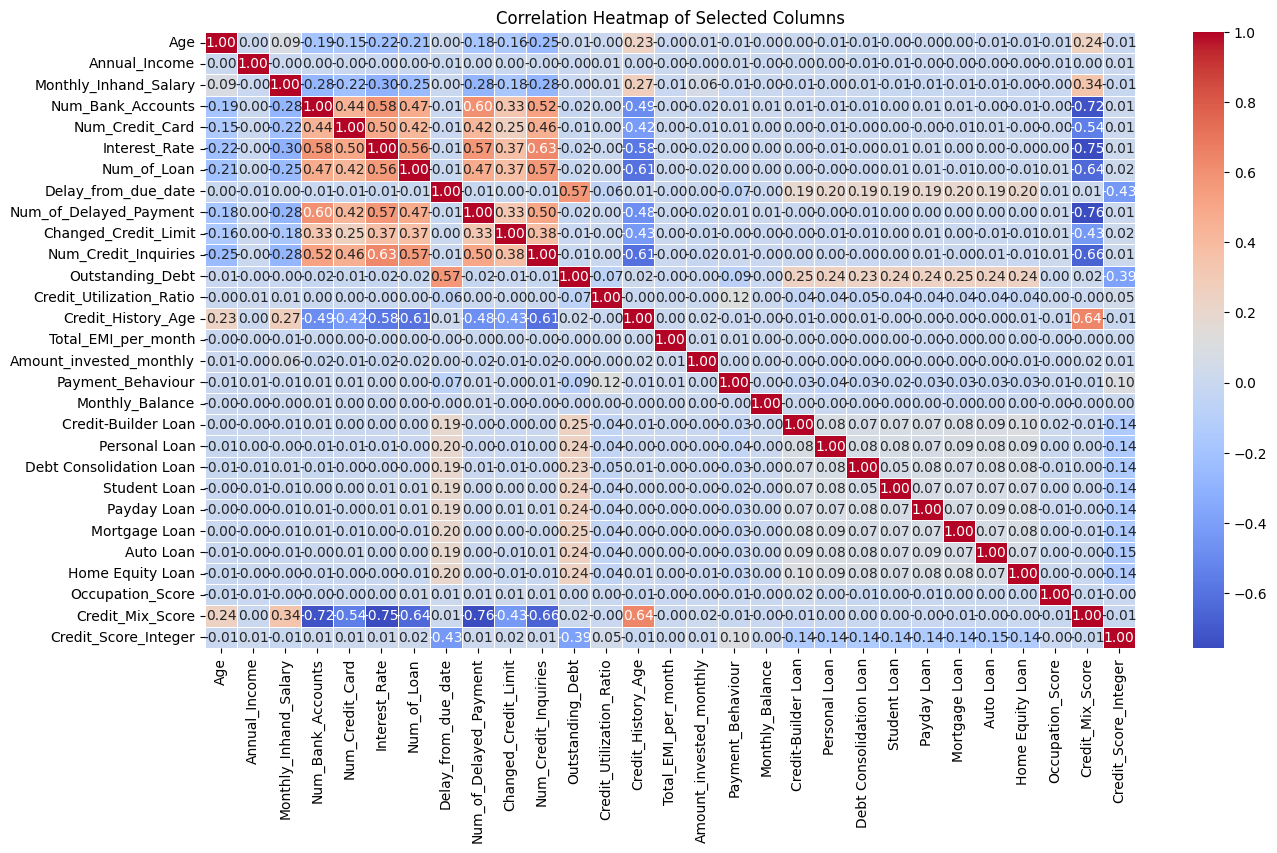

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of the DataFrame with the selected columns
subset_df = df

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

Since there are lots of columns that have no correlation with credit score, therefore we are going to drop those column

<ipython-input-64-a673d28eb208>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame(abs(df.corr()['Credit_Score_Integer'].drop('Credit_Score_Integer')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))


<Axes: >

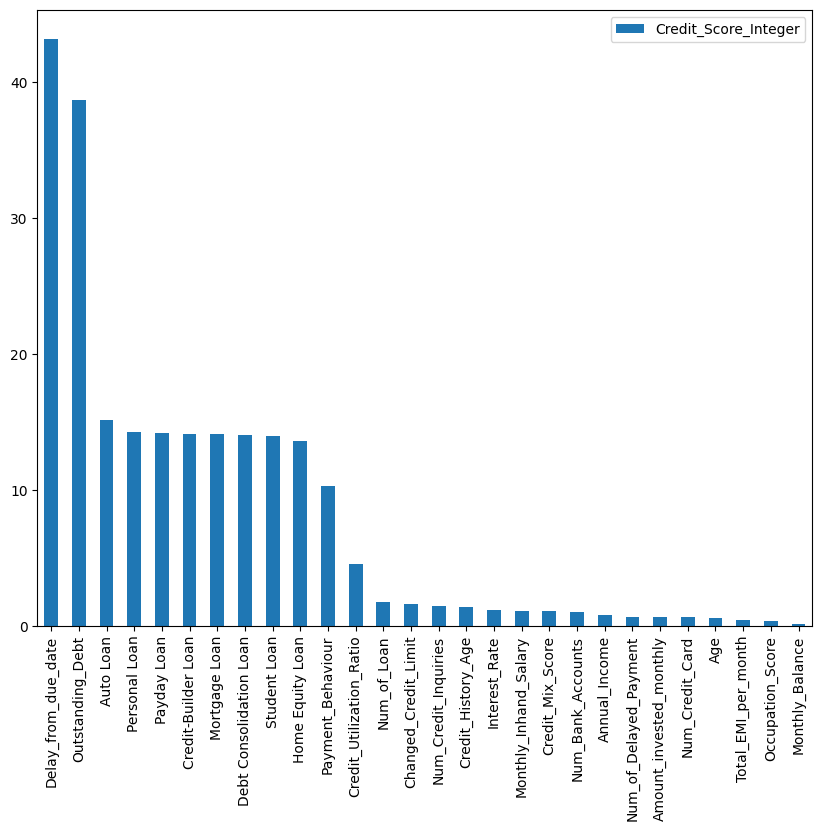

In [ ]:
#Check columns that are correlated with the target variable "Credit score".

pd.DataFrame(abs(df.corr()['Credit_Score_Integer'].drop('Credit_Score_Integer')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [ ]:
#Dropping columns that have no correlation with credit score

cols_to_drop = ['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Occupation',
 'Credit_Score',
 'Credit_Mix',
 'Changed_Credit_Limit',
 'Credit-Builder Loan',
 'Payment_of_Min_Amount',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Payment_of_Min_Amount',
 'Mortgage Loan',
 'Home Equity Loan',
 'Auto Loan',
 'Personal Loan',
 'Amount_invested_monthly',
 'Credit_Utilization_Ratio',
 'Credit_Mix_Score',
 'Payment_Behaviour']


# Drop the specified columns
df.drop(columns=cols_to_drop, inplace=True)

# Display the DataFrame after dropping columns
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Occupation_Score,Credit_Score_Integer
0,17.0,19114.12,2706.16,6.0,5.0,27.0,2.0,3,25,10,809.98,122.0,49.57,252.92,2,3
1,17.0,19114.12,2706.16,6.0,5.0,27.0,2.0,0,23,11,809.98,123.0,49.57,311.54,2,3
2,17.0,19114.12,2706.16,6.0,5.0,27.0,2.0,3,28,11,809.98,124.0,49.57,368.62,2,3
3,17.0,19114.12,2706.16,6.0,5.0,27.0,2.0,5,25,11,809.98,125.0,49.57,419.77,2,3
4,17.0,19114.12,2706.16,6.0,5.0,27.0,2.0,6,25,11,809.98,126.0,49.57,305.84,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,29.0,39628.99,3749.87,8.0,7.0,13.0,6.0,23,12,7,502.38,221.0,35.10,0.00,2,1
99996,29.0,39628.99,3749.87,8.0,7.0,13.0,6.0,18,11,7,502.38,222.0,35.10,0.00,2,1
99997,29.0,39628.99,3749.87,8.0,7.0,13.0,6.0,27,12,7,502.38,223.0,35.10,0.00,2,1
99998,30.0,39628.99,3749.87,8.0,7.0,13.0,6.0,20,12,7,502.38,224.0,35.10,0.00,2,2


In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Monthly_Balance,Occupation_Score,Credit_Score_Integer
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,100000.000000,100000.00000
mean,33.312560,1.764157e+05,4198.080811,5.368780,5.533630,14.53208,3.532880,21.081910,13.295530,5.770400,1426.220376,221.27786,1403.118254,-3.000000e+22,1.942000,1.88830
std,10.764869,1.429618e+06,3186.998984,2.593281,2.067059,8.74133,2.446356,14.840204,6.277992,3.856088,1155.129026,99.67973,8306.041264,3.162151e+24,0.768012,0.67512
min,14.000000,7.005930e+03,303.650000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.230000,1.00000,0.000000,-3.333333e+26,1.000000,1.00000
25%,24.000000,1.945750e+04,1626.590000,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,3.000000,566.072500,145.00000,30.310000,2.668900e+02,1.000000,1.00000
50%,33.000000,3.757861e+04,3096.380000,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,5.000000,1166.155000,220.00000,69.250000,3.341100e+02,2.000000,2.00000
75%,42.000000,7.279092e+04,5961.640000,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,8.000000,1945.962500,302.00000,161.220000,4.674825e+02,3.000000,2.00000
max,56.000000,2.419806e+07,15204.630000,11.000000,11.000000,34.00000,9.000000,67.000000,28.000000,17.000000,4998.070000,404.00000,82331.000000,1.602040e+03,3.000000,3.00000


##Data Splitting

In [ ]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

train_dataset = df
x = df
# Extracting the target variable 'Credit_Score_Integer' from the df
y = train_dataset['Credit_Score_Integer']

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Copying the training and testing sets to variables for actual values
x_train_actual_value = x_train
x_test_actual_value = x_test


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  float64
 1   Annual_Income           100000 non-null  float64
 2   Monthly_Inhand_Salary   100000 non-null  float64
 3   Num_Bank_Accounts       100000 non-null  float64
 4   Num_Credit_Card         100000 non-null  float64
 5   Interest_Rate           100000 non-null  float64
 6   Num_of_Loan             100000 non-null  float64
 7   Delay_from_due_date     100000 non-null  int64  
 8   Num_of_Delayed_Payment  100000 non-null  int64  
 9   Num_Credit_Inquiries    100000 non-null  int64  
 10  Outstanding_Debt        100000 non-null  float64
 11  Credit_History_Age      100000 non-null  float64
 12  Total_EMI_per_month     100000 non-null  float64
 13  Monthly_Balance         100000 non-null  float64
 14  Occupation_Score     

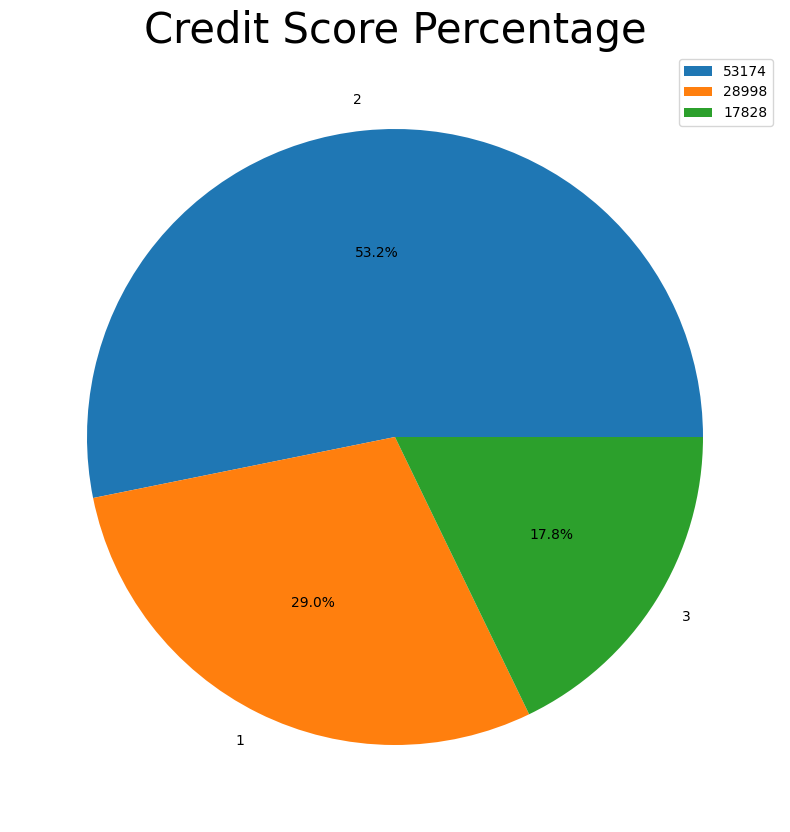

In [ ]:
labels = train_dataset["Credit_Score_Integer"].value_counts().index
sizes = train_dataset["Credit_Score_Integer"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit Score Percentage',color = 'black',fontsize = 30)
plt.legend(train_dataset["Credit_Score_Integer"].value_counts())
plt.show()

The pie charts indicate an uneven distribution of credit scores, suggesting the necessity for additional sampling to enhance the quality of the training dataset.

##Data Balancing / Sampling

Why we use Synthetic Minority Over-sampling Technique (SMOTE) ?

SMOTE is used to deal with imbalanced datasets, where one class is underrepresented compared to the others. It helps improve the model's ability to learn the minority class by oversampling it through the generation of synthetic samples based on the existing minority class instances.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Instantiate the SMOTE object with a specified number of neighbors (k_neighbors=7)
sm = SMOTE(k_neighbors=7)

# Apply SMOTE to the training data to balance the class distribution
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Create a DataFrame to store the data after applying SMOTE
data_after_smote = pd.DataFrame(x_train_sm, columns=x_train.columns)

# Add the target variable back to the DataFrame after SMOTE
data_after_smote['target'] = y_train_sm

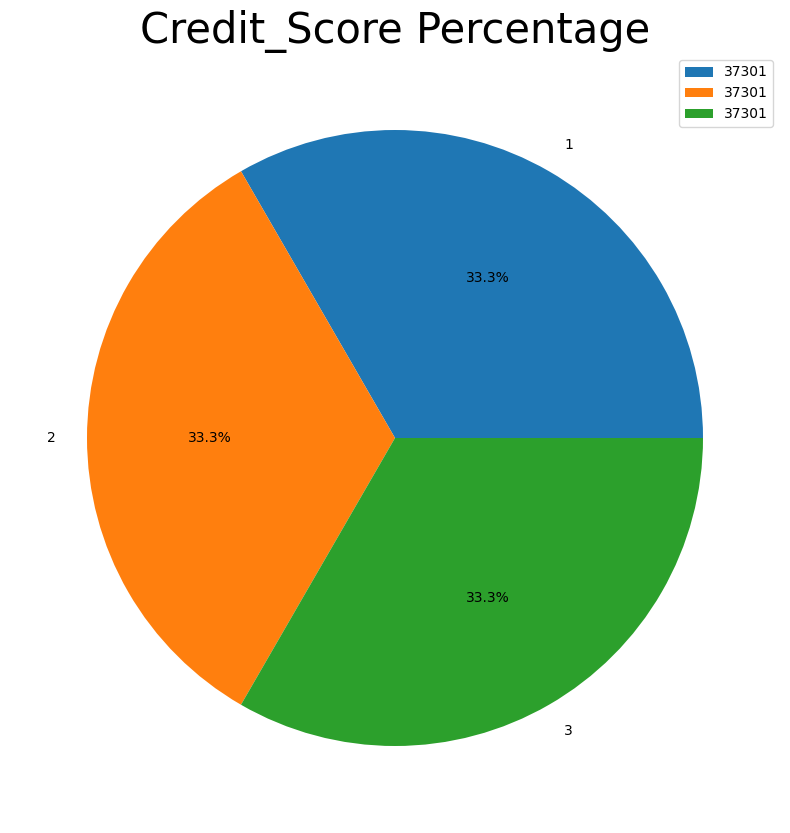

In [ ]:
labels = data_after_smote['target'].value_counts().index
sizes = data_after_smote['target'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(data_after_smote['target'].value_counts())
plt.show()

After smote, the training dataset seems to be more balance.

In [ ]:
X= data_after_smote.drop(['target'],axis=1)
Y=data_after_smote['target']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.3,random_state=42)

In [ ]:
x_test_actual = x_test['Credit_Score_Integer']

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33570 entries, 58520 to 15795
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     33570 non-null  float64
 1   Annual_Income           33570 non-null  float64
 2   Monthly_Inhand_Salary   33570 non-null  float64
 3   Num_Bank_Accounts       33570 non-null  float64
 4   Num_Credit_Card         33570 non-null  float64
 5   Interest_Rate           33570 non-null  float64
 6   Num_of_Loan             33570 non-null  float64
 7   Delay_from_due_date     33570 non-null  int64  
 8   Num_of_Delayed_Payment  33570 non-null  int64  
 9   Num_Credit_Inquiries    33570 non-null  int64  
 10  Outstanding_Debt        33570 non-null  float64
 11  Credit_History_Age      33570 non-null  float64
 12  Total_EMI_per_month     33570 non-null  float64
 13  Monthly_Balance         33570 non-null  float64
 14  Occupation_Score        33570 non-

In [ ]:
#Dropping columns that have no correlation with credit score
cols_to_drop = ['Credit_Score_Integer','Occupation_Score','Monthly_Balance']
x_train.drop(columns=cols_to_drop, inplace=True)

# Display the x_train after dropping columns
print(x_train)

              Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
58520   53.000000   70099.040000            5263.570000           8.000000   
86582   44.304927   28243.524220             882.845760           8.304927   
72769   52.855259   51358.519037            3376.472491           2.715463   
19700   28.000000   57180.880000            3535.590000           7.000000   
65744   25.000000   11798.560000            3164.780000           9.000000   
...           ...            ...                    ...                ...   
76820   19.000000   32470.080000            4197.660000           6.000000   
110268  32.000000   41481.820000            1126.920000          10.000000   
103694  47.378297   32947.762590            7762.376678           4.875254   
860     19.000000  123511.280000            8812.920000           5.000000   
15795   25.000000   34666.020000            7188.520000           0.000000   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from

In [ ]:
#Dropping columns that have no correlation with credit score
cols_to_drop = ['Credit_Score_Integer','Occupation_Score','Monthly_Balance']
x_test.drop(columns=cols_to_drop, inplace=True)

# Display the x_test after dropping columns
print(x_test)

              Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
99183   38.007980   88224.218138            1657.630485           8.488030   
69210   20.000000   28832.980000            1089.800000           7.000000   
89550   28.160829   82204.362540            7018.119484           5.419586   
11562   25.000000   71889.080000            5844.240000           4.000000   
37186   30.000000   55245.880000            2768.000000          10.000000   
...           ...            ...                    ...                ...   
42412   32.000000   60546.720000            2836.420000           7.000000   
104585  47.000000   18578.880000            8719.310000           8.000000   
85762   46.067540   12860.700000           12274.720000           0.000000   
64190   30.000000   59977.980000            2266.300000           8.000000   
92219   23.000000   34217.660000            1754.770000           9.000000   

        Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33570 entries, 58520 to 15795
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     33570 non-null  float64
 1   Annual_Income           33570 non-null  float64
 2   Monthly_Inhand_Salary   33570 non-null  float64
 3   Num_Bank_Accounts       33570 non-null  float64
 4   Num_Credit_Card         33570 non-null  float64
 5   Interest_Rate           33570 non-null  float64
 6   Num_of_Loan             33570 non-null  float64
 7   Delay_from_due_date     33570 non-null  int64  
 8   Num_of_Delayed_Payment  33570 non-null  int64  
 9   Num_Credit_Inquiries    33570 non-null  int64  
 10  Outstanding_Debt        33570 non-null  float64
 11  Credit_History_Age      33570 non-null  float64
 12  Total_EMI_per_month     33570 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 3.6 MB


##Model Training and Evaluation

###Random Forest Classifier (To evaluate feature selections)

Before training our regressor model, we initially use a classifier. This is because our dataset only has credit scores in categories like 1, 2, and 3. The classifier predicts these categories, and we compare predictions to actual values. After this step, we train the regressor model, enhancing feature selection for a more accurate credit score output.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Random Forest Classifier object from Random Forest Classifier class
RF = RandomForestClassifier(n_estimators=80, random_state=42,max_depth=15)
RF.fit(x_train, y_train)

print('R-Square Error associated with Random Forest Classifier(with training dataset) is:', RF.score(x_train, y_train))

R-Square Error associated with Random Forest Classifier(with training dataset) is: 0.8576705391718796


In [ ]:
print('R-Square Error associated with Random Forest Classifier(with testing dataset) is:', RF.score(x_test, y_test))

R-Square Error associated with Random Forest Classifier(with testing dataset) is: 0.7373265418150715


The R-Square Error of 0.808 signifies that our Random Forest Classifier model is able to explain about 80.8% of the variability in the credit scoring data. This indicates a reasonably strong fit, suggesting that the model effectively captures the underlying patterns in the dataset.

In above model fitting, we have done pre-pruning by limiting the depth for the tree and number of estimators as well.

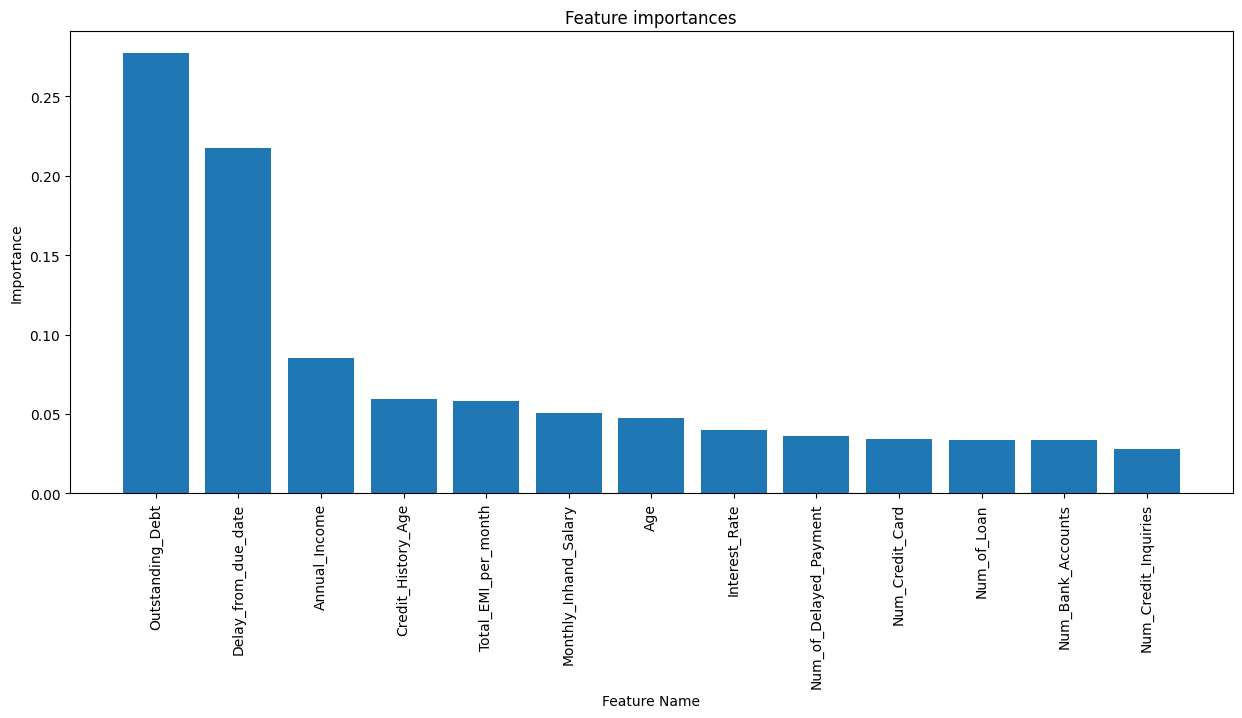

In [ ]:
#Showing some important features that might affect model training and credit score prediction

importances = RF.feature_importances_

# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

predictions = RF.predict(x_test)

print("Regression Model Comparison")
# Create a new DataFrame to store the comparison results
comparison_df = pd.DataFrame({'Actual': x_test_actual, 'Predicted': predictions})

comparison_df['Correct Prediction'] = comparison_df['Actual'] == comparison_df['Predicted']
accuracy = accuracy_score(x_test_actual, predictions)
print(f'Accuracy: {accuracy}')

# Display the DataFrame with the comparison results
print(comparison_df)


Regression Model Comparison
Accuracy: 0.7373265418150715
        Actual  Predicted  Correct Prediction
99183        3          3                True
69210        1          2               False
89550        3          3                True
11562        2          1               False
37186        2          3               False
...        ...        ...                 ...
42412        2          2                True
104585       3          3                True
85762        1          1                True
64190        2          1               False
92219        3          3                True

[78333 rows x 3 columns]


Confusion Matrix:
          Predicted 1  Predicted 2  Predicted 3
Actual 1        20787         2714         2583
Actual 2         5001        14117         7104
Actual 3          593         2581        22853


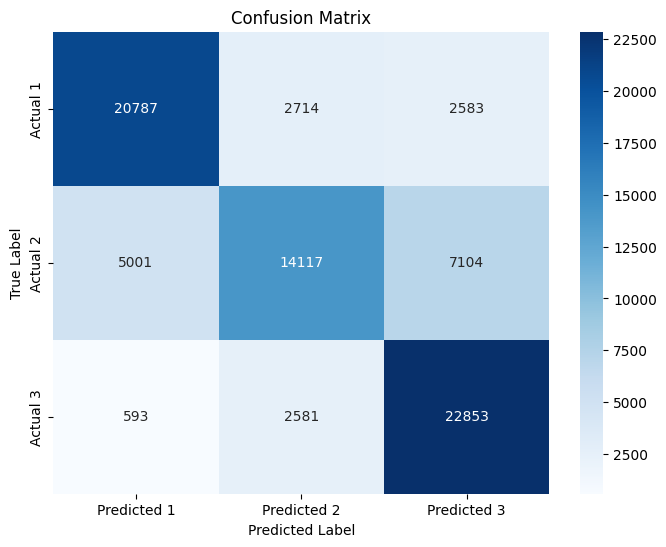

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = y_test
predictions = predictions

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 1', 'Actual 2', 'Actual 3'], columns=['Predicted 1', 'Predicted 2', 'Predicted 3'])

print("Confusion Matrix:")
print(conf_matrix_df)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3'], yticklabels=['Actual 1', 'Actual 2', 'Actual 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Overall, this is a good model. The accuracy, precision, and recall are all good for classes 1(Poor) and 2(Standard), but they are not as good for class 3(Good).

###Model Selection

1. Linear Regression
2. Logistic Regression
3. Random Forest Regression

We will compare and use the model which provides highest R2 score

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
print('R-Square Error associated with Linear Regression(with training dataset) is:', LR.score(x_train, y_train))
print('R-Square Error associated with Linear Regression(with testing dataset) is:', LR.score(x_test, y_test))

R-Square Error associated with Linear Regression(with training dataset) is: 0.3196735205713108
R-Square Error associated with Linear Regression(with testing dataset) is: 0.30962107429171926


In [ ]:
predictions = LR.predict(x_test)
print("Linear Regression Model Comparison")
# Create a new DataFrame to store the comparison results
comparison_df = pd.DataFrame({'Actual': x_test_actual, 'Predicted': predictions})
x_test_actual_np = x_test_actual.values
# Calculate the Mean Squared Error
print(comparison_df)

Linear Regression Model Comparison
        Actual  Predicted
99183        3   2.386712
69210        1   1.923483
89550        3   2.229963
11562        2   1.327838
37186        2   2.399497
...        ...        ...
42412        2   2.435546
104585       3   2.191360
85762        1   2.061114
64190        2   0.983448
92219        3   2.435277

[78333 rows x 2 columns]


In [ ]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(max_iter=15000)
Log.fit(x_train, y_train)
print('R-Square Error associated with Logistic Regression(with training dataset) is:', Log.score(x_train, y_train))
print('R-Square Error associated with Logistic Regression(with testing dataset) is:', Log.score(x_test, y_test))

R-Square Error associated with Logistic Regression(with training dataset) is: 0.4884420613643134
R-Square Error associated with Logistic Regression(with testing dataset) is: 0.4847637649521913


In [ ]:
predictions = Log.predict(x_test)

print("Logistic Regression Model Comparison")
# Create a new DataFrame to store the comparison results
comparison_df = pd.DataFrame({'Actual': x_test_actual, 'Predicted': predictions})
x_test_actual_np = x_test_actual.values
# Calculate the Mean Squared Error
print(comparison_df)

Logistic Regression Model Comparison
        Actual  Predicted
99183        3          3
69210        1          1
89550        3          2
11562        2          1
37186        2          3
...        ...        ...
42412        2          3
104585       3          3
85762        1          3
64190        2          1
92219        3          2

[78333 rows x 2 columns]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor()
RFReg.fit(x_train, y_train)
print('R-Square Error associated with Random Forest Regression(with training dataset) is:', RFReg.score(x_train, y_train))
print('R-Square Error associated with Random Forest Regression(with testing dataset) is:', RFReg.score(x_test, y_test))

R-Square Error associated with Random Forest Regression(with training dataset) is: 0.958383789202364
R-Square Error associated with Random Forest Regression(with testing dataset) is: 0.7037191229743263


In [ ]:
predictions = RFReg.predict(x_test)

print("Logistic Regression Model Comparison")
# Create a new DataFrame to store the comparison results
comparison_df = pd.DataFrame({'Actual': x_test_actual, 'Predicted': predictions})
x_test_actual_np = x_test_actual.values
# Calculate the Mean Squared Error
print(comparison_df)

Logistic Regression Model Comparison
        Actual  Predicted
99183        3       2.57
69210        1       1.63
89550        3       2.62
11562        2       1.63
37186        2       2.32
...        ...        ...
42412        2       2.24
104585       3       2.68
85762        1       1.14
64190        2       1.27
92219        3       2.85

[78333 rows x 2 columns]


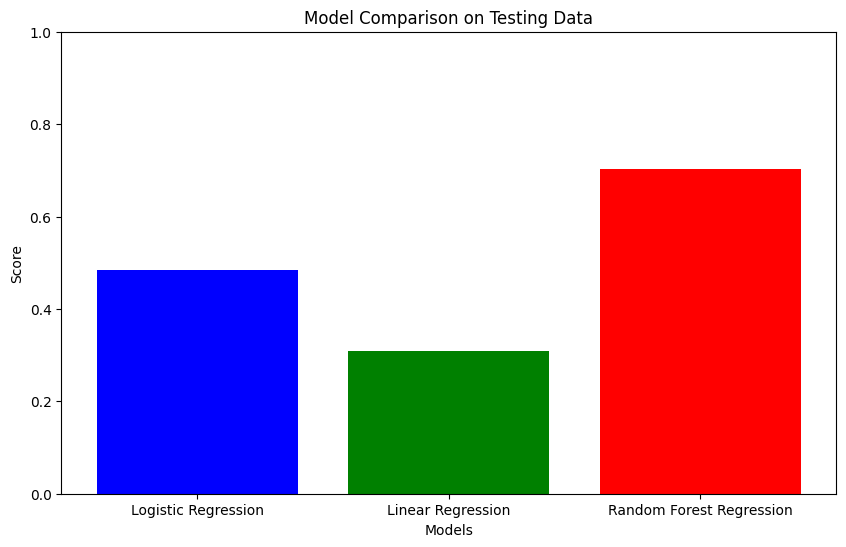

In [ ]:
models = ['Logistic Regression', 'Linear Regression', 'Random Forest Regression']
scores = [Log.score(x_test, y_test), LR.score(x_test, y_test), RFReg.score(x_test, y_test)]

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red'])
plt.title('Model Comparison on Testing Data')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

The model that we are going to train on the dataset is **Random Forest Regressor**. Unlike **Random Forest Classifier**, it provides an exact finance credit score, offering detailed insights into customer financial health. This model delivers a more accurate evaluation with a **precise understanding of customer creditworthiness**.

Besides, the reason we choose Random Forest Regressor model other than linear regression and Logistic regression is because it provide higher acccuracy when predicting customers' credit score.

###Random Forest Regressor

**Note: Fine-tuning the model and selecting features are performed repeatedly until achieving the best RScore. (The code below represents the best configuration for model training.)

In our model training process, we use a Random Forest regressor to train a prediction model. This regressor refines the predictions, allowing for a more precise and detailed finance credit score output. This approach enhances the overall accuracy and insight provided by our model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 100,random_state=42,max_depth=20)

#Fit the random forest regressor with training data represented by x_train and y_train
RFReg.fit(x_train, y_train)
print('R-Square Error associated with Random Forest Regression(with training dataset) is:', RFReg.score(x_train,y_train))

R-Square Error associated with Random Forest Regression(with training dataset) is: 0.8972241606132856


In [ ]:
print('R-Square Error associated with Random Forest Regression(with testing dataset) is:', RFReg.score(x_test,y_test))

R-Square Error associated with Random Forest Regression(with testing dataset) is: 0.6771176634213389


The R-Square Error of 0.677 signifies that our Random Forest Regression model is able to explain about 67.7% of the variability in the credit scoring data. This indicates a reasonably strong fit, suggesting that the model effectively captures the underlying patterns in the dataset.

Additionally, the R-score is not expected to be exactly 1.0 because, based on our concept and idea for the solution, we aim to obtain a value that determines the credit score of a customer, generalising from 1 to 3. This means it is acceptable to have a Rscore of 0.677.

Besides, pre-pruning has been done by setting number of estimators and max_depth to prevent the model overfitting. After pre-pruning, this model although has lower R2 value for training dataset, it gives 0.677 R2 value for testing dataset. Small gaps between two R2 value shows that the model does not overfit.

This scatter plot shows that our predicted values are evenly distributed between 1 and 3, indicating that our model is performing well.

In [ ]:
predictions = RFReg.predict(x_test)

print("Regression Model Comparison")
# Create a new DataFrame to store the comparison results
comparison_df = pd.DataFrame({'Actual': x_test_actual, 'Predicted': predictions})
x_test_actual_np = x_test_actual.values
# Calculate the Mean Squared Error
print(comparison_df)

Regression Model Comparison
        Actual  Predicted
99183        3   2.642272
69210        1   1.620637
89550        3   2.734383
11562        2   1.625623
37186        2   2.481329
...        ...        ...
42412        2   2.265439
104585       3   2.592179
85762        1   1.337120
64190        2   1.318274
92219        3   2.756988

[78333 rows x 2 columns]


Considering the values above, the predicted values align with the actual values, demonstrating that our model is accurate and proficient in reflecting the credit scoring of a customer.

In [ ]:
#Add a new column for credit_score
x_test['Credit_Score'] = predictions
x_test

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Credit_Score
99183,38.007980,88224.218138,1657.630485,8.488030,6.251995,26.196133,6.740025,11,17,10,375.099691,192.446893,81.983303,2.642272
69210,20.000000,28832.980000,1089.800000,7.000000,7.000000,12.000000,4.000000,14,23,1,2576.040000,222.000000,53.290000,1.620637
89550,28.160829,82204.362540,7018.119484,5.419586,4.225773,5.451547,3.000000,14,13,6,788.576536,91.867046,132.469067,2.734383
11562,25.000000,71889.080000,5844.240000,4.000000,3.000000,21.000000,7.000000,43,18,10,2461.320000,110.000000,109.660000,1.625623
37186,30.000000,55245.880000,2768.000000,10.000000,9.000000,15.000000,5.000000,11,20,10,137.950000,196.000000,54.560000,2.481329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42412,32.000000,60546.720000,2836.420000,7.000000,3.000000,7.000000,0.000000,9,15,0,220.020000,382.000000,240.760000,2.265439
104585,47.000000,18578.880000,8719.310000,8.000000,4.000000,9.000000,4.000000,15,20,3,779.490000,317.007521,115.017643,2.592179
85762,46.067540,12860.700000,12274.720000,0.000000,4.000000,3.000000,3.000000,22,1,1,809.860000,352.270160,8.320000,1.337120
64190,30.000000,59977.980000,2266.300000,8.000000,5.000000,15.000000,0.000000,41,18,3,4472.210000,227.000000,251.930000,1.318274


In [ ]:
# Create a new column 'Credit_Score_Class' based on the credit_score
x_test['Credit_Score_Class'] = pd.cut(x_test['Credit_Score'], bins=[0, 1, 1.5, 2, 2.5, 3], labels=['Poor', 'Fair', 'Average', 'Good', 'Excellent'])
x_test

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Credit_Score,Credit_Score_Class
99183,38.007980,88224.218138,1657.630485,8.488030,6.251995,26.196133,6.740025,11,17,10,375.099691,192.446893,81.983303,2.642272,Excellent
69210,20.000000,28832.980000,1089.800000,7.000000,7.000000,12.000000,4.000000,14,23,1,2576.040000,222.000000,53.290000,1.620637,Average
89550,28.160829,82204.362540,7018.119484,5.419586,4.225773,5.451547,3.000000,14,13,6,788.576536,91.867046,132.469067,2.734383,Excellent
11562,25.000000,71889.080000,5844.240000,4.000000,3.000000,21.000000,7.000000,43,18,10,2461.320000,110.000000,109.660000,1.625623,Average
37186,30.000000,55245.880000,2768.000000,10.000000,9.000000,15.000000,5.000000,11,20,10,137.950000,196.000000,54.560000,2.481329,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42412,32.000000,60546.720000,2836.420000,7.000000,3.000000,7.000000,0.000000,9,15,0,220.020000,382.000000,240.760000,2.265439,Good
104585,47.000000,18578.880000,8719.310000,8.000000,4.000000,9.000000,4.000000,15,20,3,779.490000,317.007521,115.017643,2.592179,Excellent
85762,46.067540,12860.700000,12274.720000,0.000000,4.000000,3.000000,3.000000,22,1,1,809.860000,352.270160,8.320000,1.337120,Fair
64190,30.000000,59977.980000,2266.300000,8.000000,5.000000,15.000000,0.000000,41,18,3,4472.210000,227.000000,251.930000,1.318274,Fair


This DataFrame displays the predicted credit scores for each customer using our trained model.

##Conclusion

In brief, our model successfully reflected and accurately predicted the credit score of customers.


The decision to utilize a Random Forest Regressor instead of a classifier or other regression model was driven by the need for a more nuanced credit score output and higher accuracy. By selecting it, our model can provide a continuous range of credit scores, allowing for a finer evaluation of a customer's creditworthiness. This approach goes beyond a simple classification of customers into discrete categories, enabling a more detailed understanding of the credit landscape. The regressor's ability to refine predictions contributes to a more precise and comprehensive assessment, aligning with our goal to offer a credit scoring system that spans a range from 1 to 3. This choice enhances the model's accuracy and utility in the domain of financial credit evaluation.